Goal :
- conduct exploratory data analysis (Eda) on our dataset
- visualize location data
- Aggregate categorical data
- Summarize numerical data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv("mexico-real-estate-clean.csv")

In [3]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [4]:
df.shape

(1736, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   float64
 5   price_usd      1736 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.5+ KB


- Location matters in real estate.
- we can locate houses in Mexico using latitude (lat) and longitude (lon) columns.
- Lat & Lon are coordinates → can be plotted on a map.
- Plotly’s scatter_mapbox is a great tool to create a scatter plot on a map using these coordinates.

In [6]:
fig = px.scatter_mapbox(
    df,   
    lat ="lat",
    lon ="lon",
    center={"lat": 19.43, "lon": -99.13},
    width=600,
    height=600,
    hover_data=["price_usd"],


)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

Categorical Data: "state"

In [7]:
df["state"].head()

0    Estado de México
1          Nuevo León
2            Guerrero
3            Guerrero
4             Yucatán
Name: state, dtype: object

In [8]:
df["state"].nunique()

30

 Use the value_counts method on the "state" column to determine the 10 most prevalent states in our dataset.

In [9]:
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

Numerical Data: "area_m2" and "price_usd"
- We know where the houses are; now check how much (price) and how big (size).
- Use descriptive statistics to summarize these numbers.

In [10]:
df[["area_m2" ,"price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


- Mean > Median → data might be skewed (a few very large houses pull the mean up).
- Both mean & median show “typical” value, but skew makes them differ.
- To understand the spread & shape, look at the distribution of area_m2.
- Two good plots:

   - Histogram → shows frequency of sizes.
   - Boxplot → shows median, quartiles & outliers.

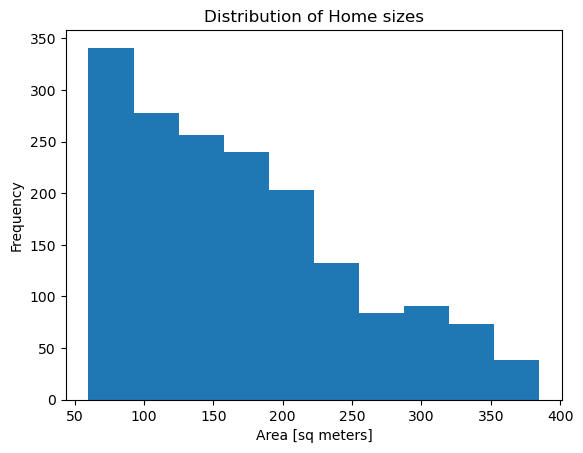

In [11]:
## Creating histogram
plt.hist(df["area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home sizes");


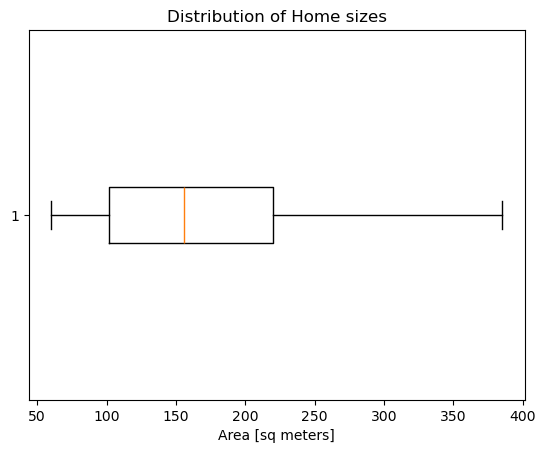

In [12]:
plt.boxplot(df["area_m2"],vert= False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home sizes");

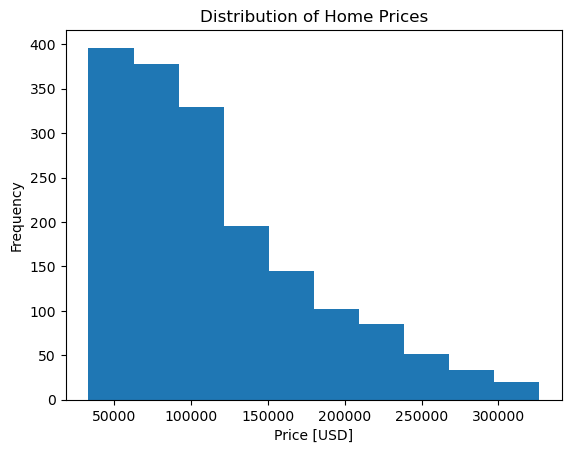

In [13]:
# create histogram of "price_usd"
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices");

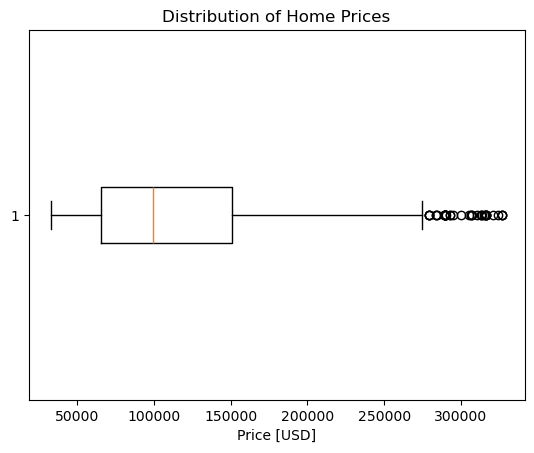

In [14]:
# create boxplot of "price_usd"
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices");